# Практика

In [1]:
# Возьмите 5 любых классификаторов, подберите для них параметры 
# и сравните итоговое качество на отложенной выборке

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_digits

In [4]:
data = load_digits()

In [5]:
X, y = data['data'], data['target']

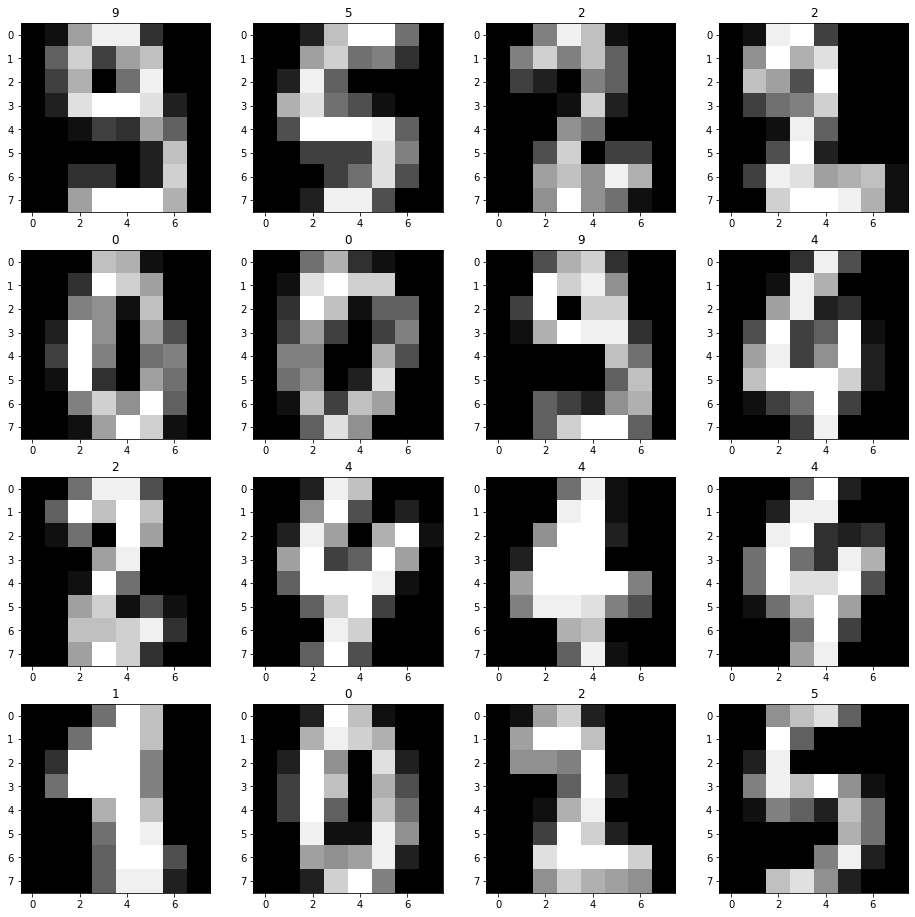

In [6]:
fig = plt.figure(figsize=(16,16))
for i in range(0, 4):
    for j in range(0,4):
        img = np.random.choice(len(X))
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.imshow(X[img].reshape(8, 8), cmap='gray')
        plt.title(y[img])
plt.show()

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)

# KNN

In [9]:
from sklearn.model_selection import GridSearchCV 

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
param_grid = {'n_neighbors': [3,5,7,9], 'weights': ['uniform', 'distance']}
param_grid

{'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

In [12]:
knn = KNeighborsClassifier()

In [13]:
grid_knn = GridSearchCV(knn, param_grid, scoring = 'accuracy', cv=10)

In [14]:
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [15]:
print('Правильность на тестовом наборе: {:.3f}'.format(grid_knn.score(X_valid, y_valid)))

Правильность на тестовом наборе: 0.981


In [16]:
print('Наилучшие значения параметров: {}'.format(grid_knn.best_params_))

Наилучшие значения параметров: {'n_neighbors': 7, 'weights': 'uniform'}


In [17]:
print('Наилучшее значение кросс-валид. правильности: {:.3f}'.format(grid_knn.best_score_))

Наилучшее значение кросс-валид. правильности: 0.972


In [18]:
print('Наилучшая модель: {}'.format(grid_knn.best_estimator_))

Наилучшая модель: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')


# LogisticRegression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10]}
param_grid

{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10]}

In [21]:
log_reg = LogisticRegression()

In [22]:
grid_log_reg = GridSearchCV(log_reg, param_grid, scoring = 'accuracy', cv = 10)

In [23]:
grid_log_reg.fit(X_train, y_train)

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [24]:
print('Правильность на тестовом наборе: {:.3f}'.format(grid_log_reg.score(X_valid, y_valid)))
print('Наилучшие значения параметров: {}'.format(grid_log_reg.best_params_))
print('Наилучшее значение кросс-валид. правильности: {:.3f}'.format(grid_log_reg.best_score_))
print('Наилучшая модель: {}'.format(grid_log_reg.best_estimator_))

Правильность на тестовом наборе: 0.975
Наилучшие значения параметров: {'C': 1, 'penalty': 'l1'}
Наилучшее значение кросс-валид. правильности: 0.960
Наилучшая модель: LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


# SVM

In [25]:
from sklearn.svm import LinearSVC

In [26]:
param_grid = {'loss': ['hinge', 'squared_hinge'], 'C': [0.01, 0.1, 1, 10]}
param_grid

{'loss': ['hinge', 'squared_hinge'], 'C': [0.01, 0.1, 1, 10]}

In [27]:
svc = LinearSVC()

In [28]:
grid_svc = GridSearchCV(svc, param_grid, scoring = 'accuracy', cv = 10)

In [29]:
grid_svc.fit(X_train, y_train)

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'loss': ['hinge', 'squared_hinge']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [30]:
print('Правильность на тестовом наборе: {:.3f}'.format(grid_log_reg.score(X_valid, y_valid)))
print('Наилучшие значения параметров: {}'.format(grid_log_reg.best_params_))
print('Наилучшее значение кросс-валид. правильности: {:.3f}'.format(grid_log_reg.best_score_))
print('Наилучшая модель: {}'.format(grid_log_reg.best_estimator_))

Правильность на тестовом наборе: 0.975
Наилучшие значения параметров: {'C': 1, 'penalty': 'l1'}
Наилучшее значение кросс-валид. правильности: 0.960
Наилучшая модель: LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


# DecisionTreeClassifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 9, None]}
param_grid

{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 9, None]}

In [33]:
dec_tree = DecisionTreeClassifier()

In [34]:
grid_tree = GridSearchCV(dec_tree, param_grid, scoring = 'accuracy', cv = 10)

In [35]:
grid_tree.fit(X_train, y_train)

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, None]},
             pre_

In [36]:
print('Правильность на тестовом наборе: {:.3f}'.format(grid_tree.score(X_valid, y_valid)))
print('Наилучшие значения параметров: {}'.format(grid_tree.best_params_))
print('Наилучшее значение кросс-валид. правильности: {:.3f}'.format(grid_tree.best_score_))
print('Наилучшая модель: {}'.format(grid_tree.best_estimator_))

Правильность на тестовом наборе: 0.839
Наилучшие значения параметров: {'criterion': 'entropy', 'max_depth': 9}
Наилучшее значение кросс-валид. правильности: 0.869
Наилучшая модель: DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


# RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
param_grid = {'n_estimators': [10, 15, 20, 25], 'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 9, None]}
param_grid

{'n_estimators': [10, 15, 20, 25],
 'criterion': ['gini', 'entropy'],
 'max_depth': [3, 5, 7, 9, None]}

In [39]:
ran_forest = RandomForestClassifier()

In [40]:
grid_forest = GridSearchCV(ran_forest, param_grid, scoring = 'accuracy', cv = 10)

In [41]:
grid_forest.fit(X_train, y_train)

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [42]:
print('Правильность на тестовом наборе: {:.3f}'.format(grid_forest.score(X_valid, y_valid)))
print('Наилучшие значения параметров: {}'.format(grid_forest.best_params_))
print('Наилучшее значение кросс-валид. правильности: {:.3f}'.format(grid_forest.best_score_))
print('Наилучшая модель: {}'.format(grid_forest.best_estimator_))

Правильность на тестовом наборе: 0.967
Наилучшие значения параметров: {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 20}
Наилучшее значение кросс-валид. правильности: 0.969
Наилучшая модель: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [43]:
estimators = {
    'knn': grid_knn,
    'regression': grid_log_reg,
    'svc': grid_svc,
    'tree': grid_tree,
    'forest': grid_forest
}

In [44]:
for k in estimators:
    v = estimators[k]
    print('Model:', k, "CV Accuracy: {:.3f}".format(v.best_score_), "Validation Accuracy: {:.3f}".format(v.best_estimator_.score(X_valid, y_valid)))

Model: knn CV Accuracy: 0.972 Validation Accuracy: 0.981
Model: regression CV Accuracy: 0.960 Validation Accuracy: 0.975
Model: svc CV Accuracy: 0.961 Validation Accuracy: 0.964
Model: tree CV Accuracy: 0.869 Validation Accuracy: 0.839
Model: forest CV Accuracy: 0.969 Validation Accuracy: 0.967


In [45]:
# По этим результатам видно, что лучшее качество на валидационной выборке показала модель knn. 

# Домашняя работа

In [46]:
# Взять boston house-prices datase (sklearn.datasets.load_boston) и 
# сделать тоже самое для задачи регрессии (попробовать разные алгоритмы, 
# поподбирать параметры, вывести итоговое качество)

In [47]:
from sklearn.datasets import load_boston

In [48]:
data = load_boston()

In [49]:
X, y = data['data'], data['target']

In [50]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2) 

In [51]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)

# KNN

In [52]:
from sklearn.neighbors import KNeighborsRegressor

In [53]:
grid_param = {'n_neighbors': list(range(1, 30)), 'weights': ['uniform', 'distance']}

In [54]:
knn_reg = KNeighborsRegressor()

In [55]:
grid_knn_reg = GridSearchCV(knn_reg, grid_param, scoring = 'r2', cv = 10)

In [56]:
grid_knn_reg.fit(X_train, y_train)

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [57]:
print('Правильность на тестовом наборе: {:.3f}'.format(grid_knn_reg.score(X_valid, y_valid)))
print('Наилучшие значения параметров: {}'.format(grid_knn_reg.best_params_))
print('Наилучшее значение кросс-валид. правильности: {:.3f}'.format(grid_knn_reg.best_score_))
print('Наилучшая модель: {}'.format(grid_knn_reg.best_estimator_))

Правильность на тестовом наборе: 0.685
Наилучшие значения параметров: {'n_neighbors': 3, 'weights': 'distance'}
Наилучшее значение кросс-валид. правильности: 0.792
Наилучшая модель: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='distance')


# DecisionTreeRegressor

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
param_grid = {'max_depth': [5, 11, 15, None], 'min_samples_leaf':list(range(1, 10))}

In [60]:
tree_reg = DecisionTreeRegressor()

In [61]:
grid_tree_reg = GridSearchCV(tree_reg, param_grid, scoring = 'r2', cv = 10)

In [62]:
grid_tree_reg.fit(X_train, y_train)

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 11, 15, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

In [63]:
print('Правильность на тестовом наборе: {:.3f}'.format(grid_tree_reg.score(X_valid, y_valid)))
print('Наилучшие значения параметров: {}'.format(grid_tree_reg.best_params_))
print('Наилучшее значение кросс-валид. правильности: {:.3f}'.format(grid_tree_reg.best_score_))
print('Наилучшая модель: {}'.format(grid_tree_reg.best_estimator_))

Правильность на тестовом наборе: 0.768
Наилучшие значения параметров: {'max_depth': 11, 'min_samples_leaf': 9}
Наилучшее значение кросс-валид. правильности: 0.732
Наилучшая модель: DecisionTreeRegressor(criterion='mse', max_depth=11, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=9,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


# RandomForestRegressor

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
param_grid = {'n_estimators': [5, 15, 25, 35], 'max_depth': [5, 11, 15, None]}
param_grid

{'n_estimators': [5, 15, 25, 35], 'max_depth': [5, 11, 15, None]}

In [66]:
for_reg = RandomForestRegressor()

In [67]:
grid_forest_reg = GridSearchCV(for_reg, param_grid, scoring = 'r2', cv = 10)

In [68]:
grid_forest_reg.fit(X_train, y_train)

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 11, 15, None]

In [69]:
print('Правильность на тестовом наборе: {:.3f}'.format(grid_forest_reg.score(X_valid, y_valid)))
print('Наилучшие значения параметров: {}'.format(grid_forest_reg.best_params_))
print('Наилучшее значение кросс-валид. правильности: {:.3f}'.format(grid_forest_reg.best_score_))
print('Наилучшая модель: {}'.format(grid_forest_reg.best_estimator_))

Правильность на тестовом наборе: 0.889
Наилучшие значения параметров: {'max_depth': None, 'n_estimators': 15}
Наилучшее значение кросс-валид. правильности: 0.841
Наилучшая модель: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=15,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


# GradientBoostingRegressor

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

In [71]:
grid_param = {'n_estimators': [5, 15, 25, 35, 55], 'max_depth': [5, 11, 15, None]}

In [72]:
boost_reg = GradientBoostingRegressor()

In [73]:
grid_boost_reg = GridSearchCV(boost_reg, grid_param, scoring = 'r2', cv = 10)

In [74]:
grid_boost_reg.fit(X_train, y_train)

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
               

In [75]:
print('Правильность на тестовом наборе: {:.3f}'.format(grid_boost_reg.score(X_valid, y_valid)))
print('Наилучшие значения параметров: {}'.format(grid_boost_reg.best_params_))
print('Наилучшее значение кросс-валид. правильности: {:.3f}'.format(grid_boost_reg.best_score_))
print('Наилучшая модель: {}'.format(grid_boost_reg.best_estimator_))

Правильность на тестовом наборе: 0.909
Наилучшие значения параметров: {'max_depth': 5, 'n_estimators': 55}
Наилучшее значение кросс-валид. правильности: 0.846
Наилучшая модель: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=55,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [76]:
estimators = {
    'knn': grid_knn_reg,
    'tree': grid_tree_reg,
    'forest': grid_forest_reg,
    'boosting': grid_boost_reg
}

In [77]:
for k in estimators:
    v = estimators[k]
    print('Model:', k, "CV Accuracy: {:.3f}".format(v.best_score_), "Validation Accuracy: {:.3f}".format(v.best_estimator_.score(X_valid, y_valid)))

Model: knn CV Accuracy: 0.792 Validation Accuracy: 0.685
Model: tree CV Accuracy: 0.732 Validation Accuracy: 0.768
Model: forest CV Accuracy: 0.841 Validation Accuracy: 0.889
Model: boosting CV Accuracy: 0.846 Validation Accuracy: 0.909


In [217]:
# Видно, что наибольшее качество показывает GradientBoosting